# PROCESAMIENTO DIGITAL DE SEÑALES DE AUDIO

## Filtros en tiempo discreto


En este notebook se analizará diferentes formas de representación de la respuesta de sistemas lineales invariantes en el tiempo (SLITs) en el dominio de tiempo discreto.

### Cómo correr el notebook
Se puede bajar y correr el notebook de forma local en una computadora.

O también se puede correr en Google Colab usando el siguiente enlace. 

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/notebooks/audioDSP-SLITS-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [39]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
#from scipy.io import wavfile

import IPython.display as ipd

### SLITS - Respuesta al Impulso

Los filtros lineales invariantes en el tiempo se pueden caracterizar mediante a la respuesta al impulso. 
Si la respuesta al impulso de un filto es $h[n]$ entonces es posible escribir la salida $y[n]$ como la convolución entre la entrada $x[n]$ y $h[n]$.

$$y[n] = (x*h)[n] = \sum_{k=-\infty}^{\infty} h[k]x[n-k]$$


A constinuación se muestra ejemplos de entradas $x_1$, $x_2$, $x_3$  y una respuesta al impuslso $h[n]$.
Se grafica la entrada y la salida para cada una de ellas.

#### Ejercicio
Modifique el código para que el filtro $h$ calcule el promedio del valor de dos muestras consecutivas de la entrada.


Text(0.5, 0, 'n')

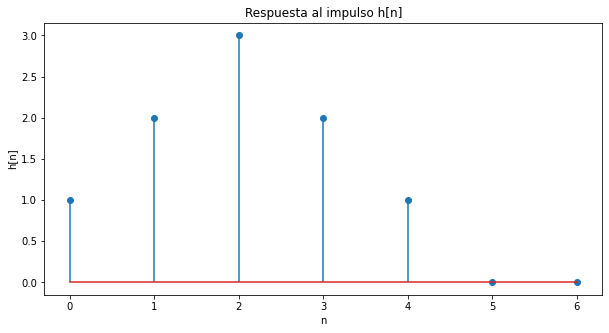

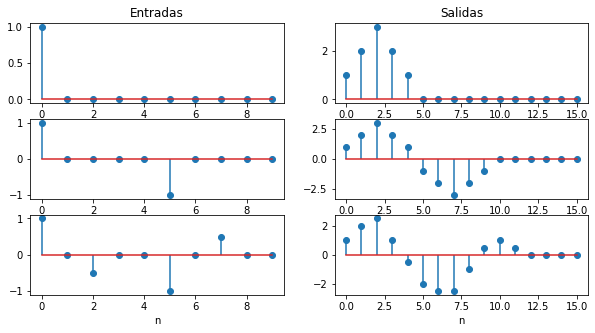

In [72]:

# Respuesta al impulso h[n]
h = [1,2,3,2,1,0,0]


plt.title('Respuesta al impulso h[n]')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.stem(h, use_line_collection = True)

#Entradas
x1 = [1,0,0,0,0,0,0,0,0,0]
x2 = [1,0,0,0,0,-1,0,0,0,0]
x3 = [1,0,-0.5,0,0,-1,0,0.5,0,0]



np.convolve([1, 2, 3], [0, 1, 0.5])


plt.rcParams['figure.figsize'] = [10, 5]
fig, axs = plt.subplots(3,2)

axs[0,0].stem(x1, use_line_collection = True)
axs[1,0].stem(x2, use_line_collection = True)
axs[2,0].stem(x3, use_line_collection = True)
axs[0,0].set_title('Entradas')
axs[2,0].set_xlabel('n')

axs[0,1].set_title('Salidas')
axs[0,1].stem(np.convolve(x1,h), use_line_collection = True)
axs[1,1].stem(np.convolve(x2,h), use_line_collection = True)
axs[2,1].stem(np.convolve(x3,h), use_line_collection = True)
axs[2,1].set_xlabel('n')


## Filtros FIR IIR

Los filtros pueden tener una respuesta al impulso de largo finito (FIR) como en el ejemplo anterior o infinito (IIR).
Algunos filtros IIR se pueden plantear como una ecuación en diferencias:

$$y[n] - a_1 y[n-1] - ... - a_N y[n-N] = b_0 x[n] + b_1 x[n-1] + ... + b_M x[n-m]$$


de la cual se obtiene el planteo en el dominio de la transformada $Z$ como un cociente de polinomios en $z$.


$$H(z) = \frac{Y(z)}{X(z)} =  \frac{\sum_0^M b_i z^{-i}}{1-\sum_1^N a_i z^{-i}}$$

Muchas propiedades de estos filtros se pueden analizar localizando la posición de sus polos y ceros.

Asimismo, en el caso en el que exista $H(z)$ para los valores de $z = e^{j\theta}$ (converja para todo $\theta$), se obtiene la Respuesta en Frecuencia $H(e^{j\theta})$, que es la transformada de Fourier en tiempo discreto de la respuesta al impulso.  La respuesta en frecuencia permite estudiar el comportamiento del sistema frente a componentes de diferentes frecuencias.





A los efectos de representar el diagrama de polos y ceros tomamos código existente con su respectiva fuente indicada en el encabezado que utilizaremos en este notebook.


In [53]:

# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

### Caraterización de un filtro

A continuación se muestra tres formas de caracterizar un filtro IIR, diseñado mediante funciones del paquete signal de Python. El filtro es un pasabajos Butterworthde orden 4 y frecuencia de corte $\pi/4$

Primero se obtienen los coeficientes a y b de un filto Butterwotrh de 4to orden mediante una de las funciones de diseño (signal.butter).

Por un lado se muestra la respuesta en frecuencia, en la que ambos ejes están expresados en escala logarítmica.

Luego se muestra el diagrama de polos y ceros donde se puede ver que los cuatro polos están cercanos a $z=1$ y a los complejos que corresponden a la frecuencia de corte $\theta = 0.25 \pi$. Asimismo se puede ver que todos los ceros se encuentran en $z=-1$ para atenuar las altas frecuencias.

Finalmente se muestra la respuesta al impulso del sistema.



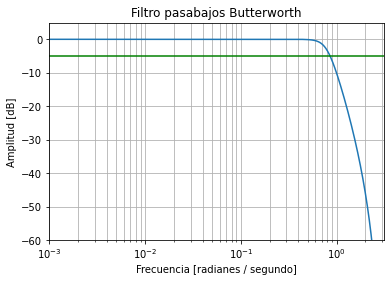

Diagrama de polos y ceros


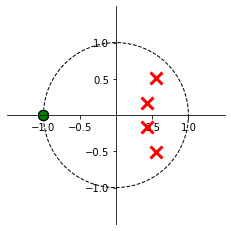

In [59]:
import numpy as np

orden_filtro = 4
f_corte = 0.25

b, a = signal.butter(orden_filtro, f_corte, 'low')

w, h = signal.freqz(b, a)

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Filtro pasabajos Butterworth')
plt.xlabel('Frecuencia [radianes / segundo]')
plt.ylabel('Amplitud [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.axis([0.001,np.pi,-60,5])
plt.show()

print('Diagrama de polos y ceros')

z,p,k = zplane(b,a)





Text(0, 0.5, 'Amplitud')

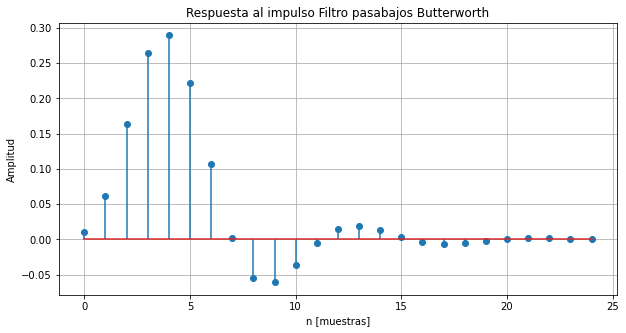

In [73]:
# Diseño del filtro
butter = signal.dlti(*signal.butter(4, 0.25, 'low'))

#Obtenemos 25 muestras de la respuesta al impulso
t, y = signal.dimpulse(butter, n=25)

#Graficamos
plt.stem(t, np.squeeze(y),use_line_collection=True)
plt.grid()
plt.title('Respuesta al impulso Filtro pasabajos Butterworth')
plt.xlabel('n [muestras]')
plt.ylabel('Amplitud')

# Caracterizacón de filtros LTI

## Respuesta en Frecuencia 

Se verá un ejemplo del comportamiento del filtro en el dominio del tiempo que es posible entender utilizando la Respuesta en Frecuencia.

$$Y (e^{j\theta}) = H(e^{j\theta}) X(e^{j\theta})$$


Una forma de observar el el dominio del tiempo cómo es la respuesta en frecuencia de un filtro, es observar la salida frente a sinuosides de diferentes frecuencias en la entrada.

Como ejemplo consideraremos tres sinusoides de frecuencias $20~Hz$, $30~Hz$ y $40~Hz$ muestreadas a $10~kHz$, graficando la entrada y la salida en las mismas gráficas cuando son filtradas con un pasabajos de frecuencia de corte $25Hz$.

In [63]:

# Vector con los valores temporales de las muestras ($T_s = 1/ f_s = 0.0001$)
t = np.arange(-0,1,.0001)

#Sinusoides de 20 30 y 40 Hz
x1 = np.cos(2*np.pi*20*t)
x2 = np.cos(2*np.pi*30*t)
x3 = np.cos(2*np.pi*40*t)

Nuevamente se diseña un filtro de Butterworth, ahora con parámetros que indican directamente la frecuencia de muestreo asumida y la frecuencia en Hz de corte. 


### Ejercicio:

- Graficar la respuesta en frecuencia para el filtro considerado
- Analizar las amplitudes de las señales a la salida y verificar que coincide con lo que indica la respuesta en frecuencia
- Cambiar el parámetro del filtro de manera que la única señal claramente atenuada sea $x_3$


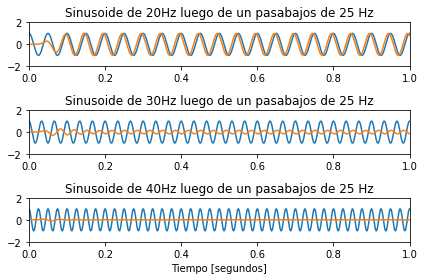

In [67]:

fig, axs = plt.subplots(3)

sos = signal.butter(10, 25, 'lowpass', fs=10000, output='sos')
y1 = signal.sosfilt(sos, x1)
y2 = signal.sosfilt(sos, x2)
y3 = signal.sosfilt(sos, x3)
axs[0].plot(t, x1)
axs[0].plot(t, y1)
#axs[0].plot(t, filtered)
axs[0].set_title('Sinusoide de 20Hz luego de un pasabajos de 25 Hz')
axs[0].axis([0, 1, -2, 2])
#axs[0].set_xlabel('Time [seconds]')

axs[1].plot(t, x2)
axs[1].plot(t, y2)
axs[1].set_title('Sinusoide de 30Hz luego de un pasabajos de 25 Hz')
axs[1].axis([0, 1, -2, 2])

axs[2].plot(t, x3)
axs[2].plot(t, y3)
axs[2].set_title('Sinusoide de 40Hz luego de un pasabajos de 25 Hz')
axs[2].axis([0, 1, -2, 2])
axs[2].set_xlabel('Tiempo [segundos]')

plt.tight_layout()
plt.show()